# Salary Prediction Of newly hired Employees 

## Data Preparation 

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('G:\data science study\Python Study\Project Data\ML case Study.csv')
college_df = pd.read_csv('G:\data science study\Python Study\Project Data\Colleges.csv')
city_df = pd.read_csv('G:\data science study\Python Study\Project Data\cities.csv')
df.shape

(1589, 8)

# Data information 

In [3]:
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [4]:
college_df.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [5]:
city_df.head()

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


# We are finding the null values in ML case Data but in this data doesn't have null values

In [7]:
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

# we have to Manipulate Data

## collage categorical data and store in list

In [8]:
Tier1 = college_df['Tier 1'].tolist()
Tier2 = college_df['Tier 2'].tolist()
Tier3 = college_df['Tier 3'].tolist()

In [9]:
for item in df.College:
    if item in Tier1:
        df['College'].replace(item, 1, inplace = True)
    elif item in Tier2:
        df['College'].replace(item, 2, inplace = True)
    elif item in Tier3:
        df['College'].replace(item, 3, inplace = True)

In [10]:
df.head()

College             City       Role  Previous CTC  Previous job change  \
0        2          Asansol    Manager       55523.0                    3   
1        2            Ajmer  Executive       57081.0                    1   
2        3  Rajpur Sonarpur  Executive       60347.0                    2   
3        3            Ajmer  Executive       49010.0                    2   
4        1         Durgapur  Executive       57879.0                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10

## Converting City categorican Data to Number and making list

In [11]:
metro_cities = city_df['Metrio City'].tolist()
non_metro_cities = city_df['non-metro cities'].tolist()

In [12]:
for item in df.City:
    if item in metro_cities:
        df['City'].replace(item, 1, inplace = True)
    elif item in non_metro_cities:
        df['City'].replace(item, 0, inplace = True)

## Convert Role categorical value

In [13]:
df['Role'].value_counts()

Role
Executive    1261
Manager       328
Name: count, dtype: int64

In [14]:
#creating new data frame as df2 that can contains numeriocal values 
df2 = pd.get_dummies(df,drop_first=True)

In [15]:
#Check all values are in numerival format
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 88.6 KB


In [16]:
#check for duplicate values
df2.duplicated().sum()

46

In [17]:
# Removing duplicate values

In [18]:
df2.drop_duplicates(inplace=True)

In [19]:
df2.shape

(1543, 8)

In [20]:
# Creating another data frame by droping ctc 
df3 = df2.drop(['CTC'], axis = 1)
print("The shape of DataFrame is : ", df3.shape)

The shape of DataFrame is :  (1543, 7)


In [21]:
print(df2.dtypes)

College                  int64
City                     int64
Previous CTC           float64
Previous job change      int64
Graduation Marks         int64
EXP (Month)              int64
CTC                    float64
Role_Manager              bool
dtype: object


In [22]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [23]:
# Now tha data is ready for Visualization and we taking Heatmap 

# Data Visualization 

### Roles and CTC.

<Axes: xlabel='Role', ylabel='CTC'>

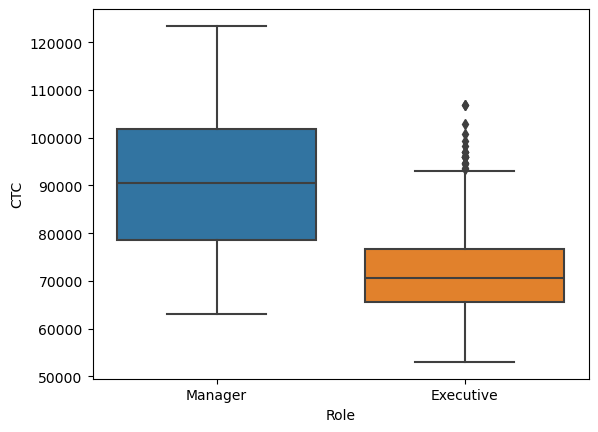

In [24]:
sns.boxplot(data=df, x='Role', y='CTC')


### Finding the correlation Matrix 

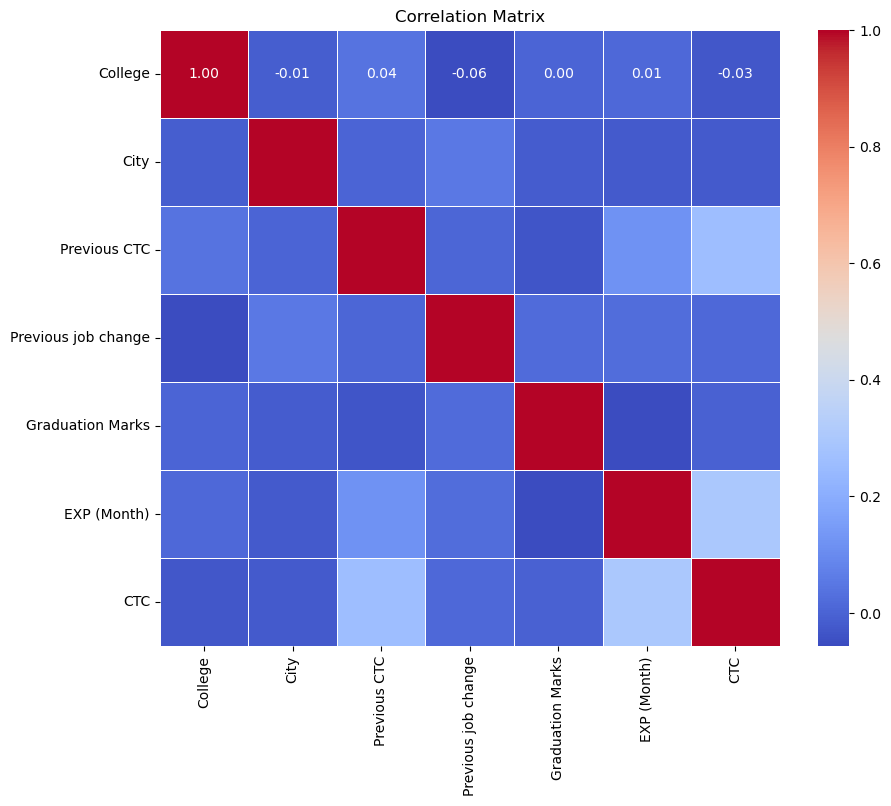

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### In this heatmap we can find correlation between every CTC and feature.

## According to Barplot of correlation 

### To the barplot we can say Role manager feature is strongly positively correlated to the CTC and also collage , city, Graduation marks are Nagetively correleted.

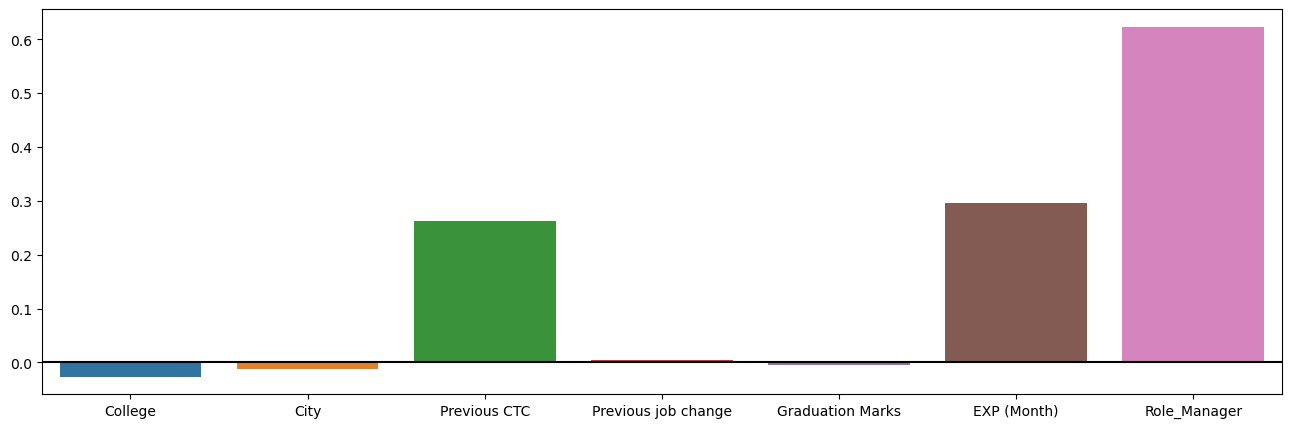

In [26]:
plt.figure(figsize = (16,5))
ax = sns.barplot(x=df3.corrwith(df2.CTC).index, y=df3.corrwith(df2.CTC))
ax.axhline(0, color = 'black')

## Outlier of Data Frame

In [27]:
df2. describe()

College         City  Previous CTC  Previous job change  \
count  1543.000000  1543.000000   1543.000000          1543.000000   
mean      1.977317     0.511342  55545.792612             2.530136   
std       0.835421     0.500033   6677.101810             1.123487   
min       1.000000     0.000000  36990.000000             1.000000   
25%       1.000000     0.000000  50537.000000             2.000000   
50%       2.000000     1.000000  55291.000000             3.000000   
75%       3.000000     1.000000  60124.500000             4.000000   
max       3.000000     1.000000  77911.000000             4.000000   

       Graduation Marks  EXP (Month)            CTC  
count       1543.000000  1543.000000    1543.000000  
mean          59.900843    39.174984   75393.887628  
std           14.926535    14.056555   12585.690921  
min           35.000000    18.000000   53020.320000  
25%           47.000000    27.000000   66939.040000  
50%           60.000000    39.000000   73028.670000  
75%           73.000000    51.000000   80601.825000  
max           85.000000    64.000000  123416.990000

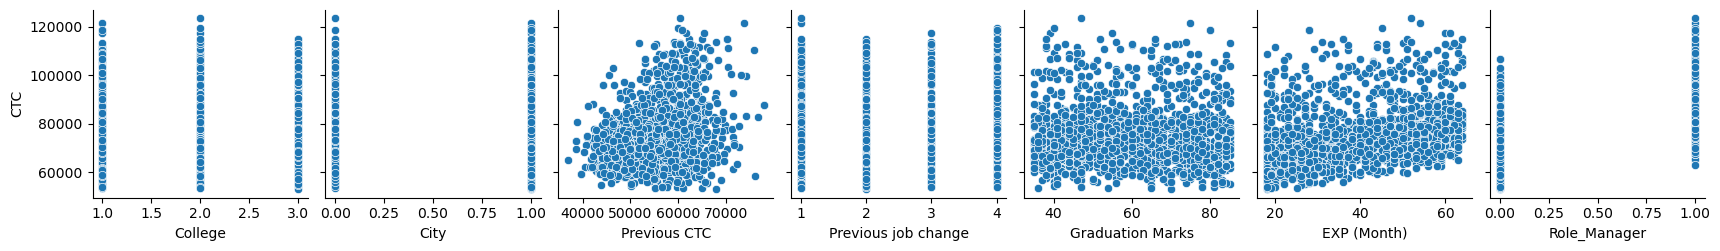

In [28]:
X_vars = ['College', 'City', 'Previous CTC', 'Previous job change' , 'Graduation Marks', 'EXP (Month)', 'Role_Manager']
y_vars = ['CTC']
sns.pairplot(x_vars = X_vars, y_vars = y_vars, data =df2)

In [29]:
def diagnostic_plots(df, variable):
    # Function takes a dataframe (df) and the variable of interest as arguments
    
    # Define figure size
    plt.figure(figsize=(20, 5))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=35)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1, 3, 3)
    if df[variable].dtype != bool: 
        sns.boxplot(y=df[variable])
        plt.title('Boxplot')
    else:
        print(f"Skipping boxplot for {variable} as it's a boolean variable.")
    
    plt.show()

**** College ****


C:\Users\deepe\AppData\Local\Temp\ipykernel_8940\3216992381.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=35)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


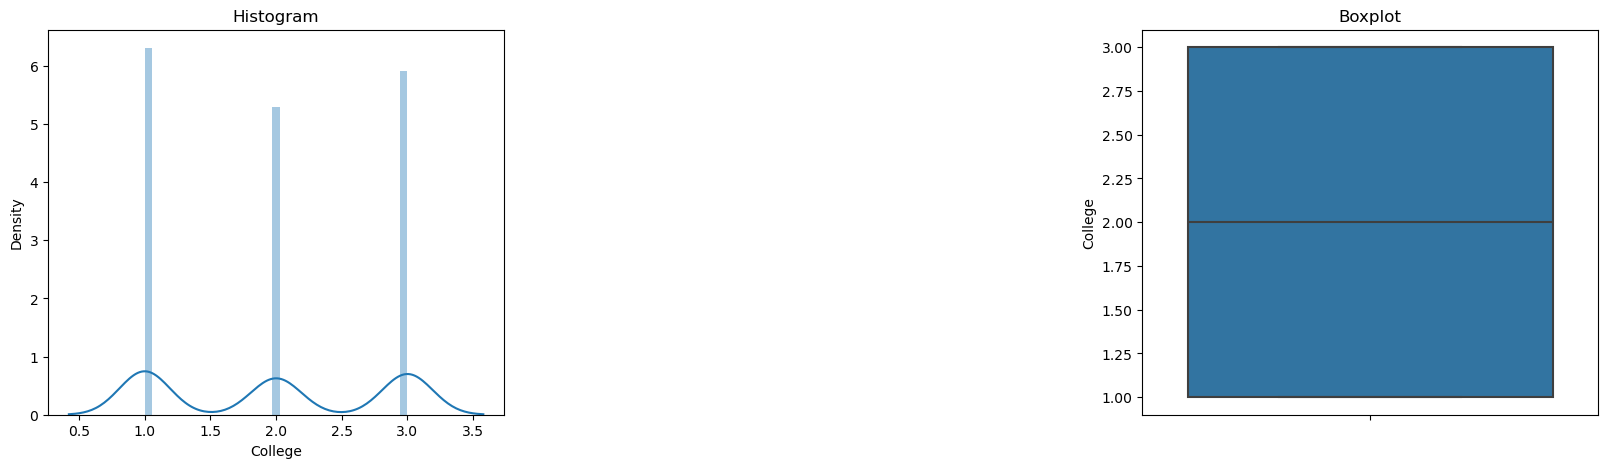

**** City ****


C:\Users\deepe\AppData\Local\Temp\ipykernel_8940\3216992381.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=35)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


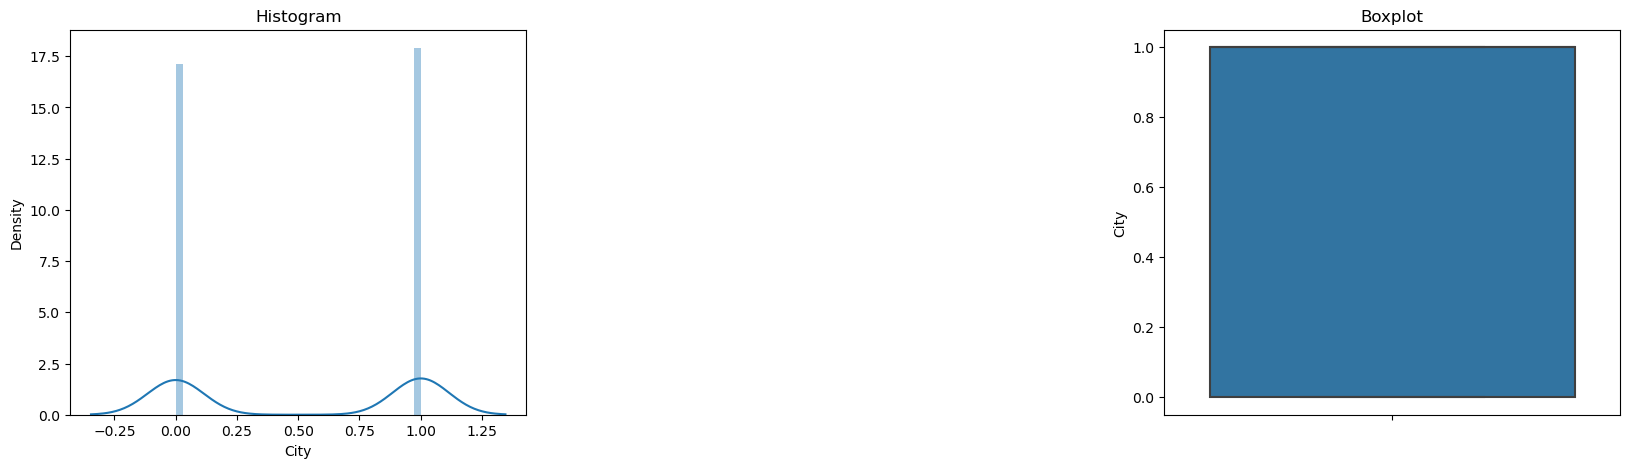

**** Previous CTC ****


C:\Users\deepe\AppData\Local\Temp\ipykernel_8940\3216992381.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=35)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


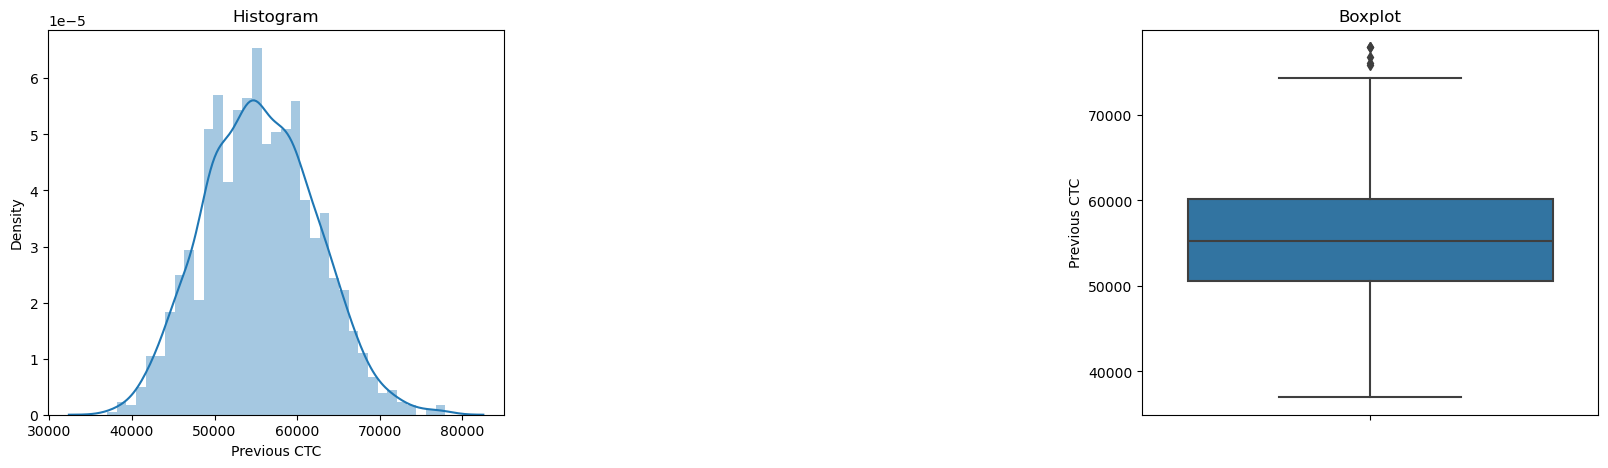

**** Previous job change ****


C:\Users\deepe\AppData\Local\Temp\ipykernel_8940\3216992381.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=35)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


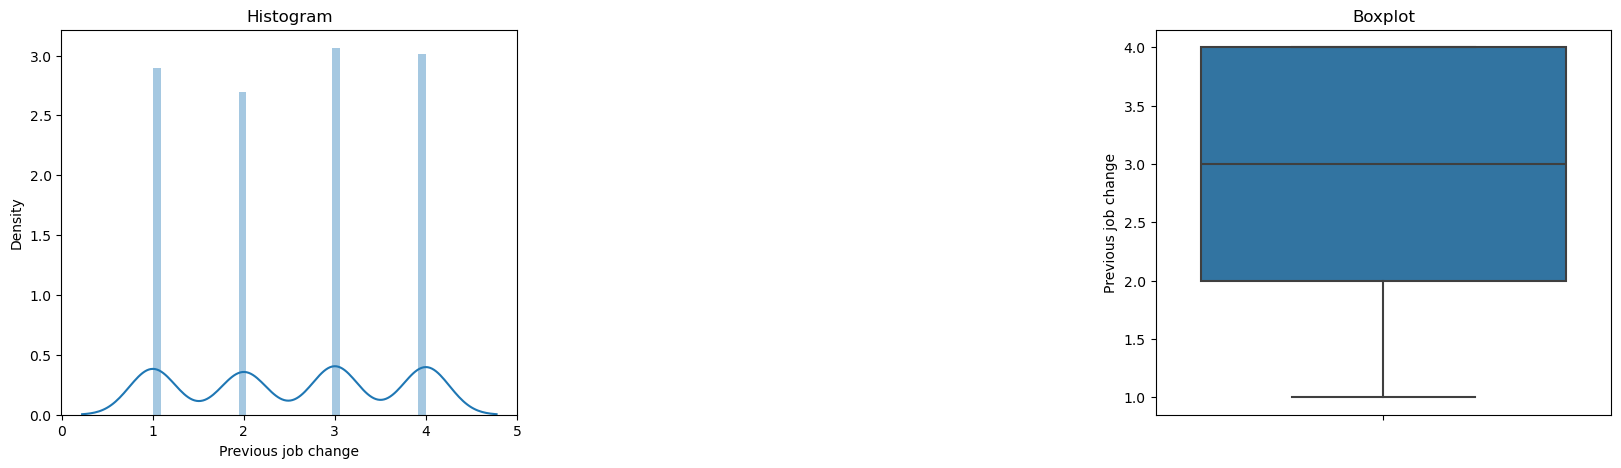

**** Graduation Marks ****


C:\Users\deepe\AppData\Local\Temp\ipykernel_8940\3216992381.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=35)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


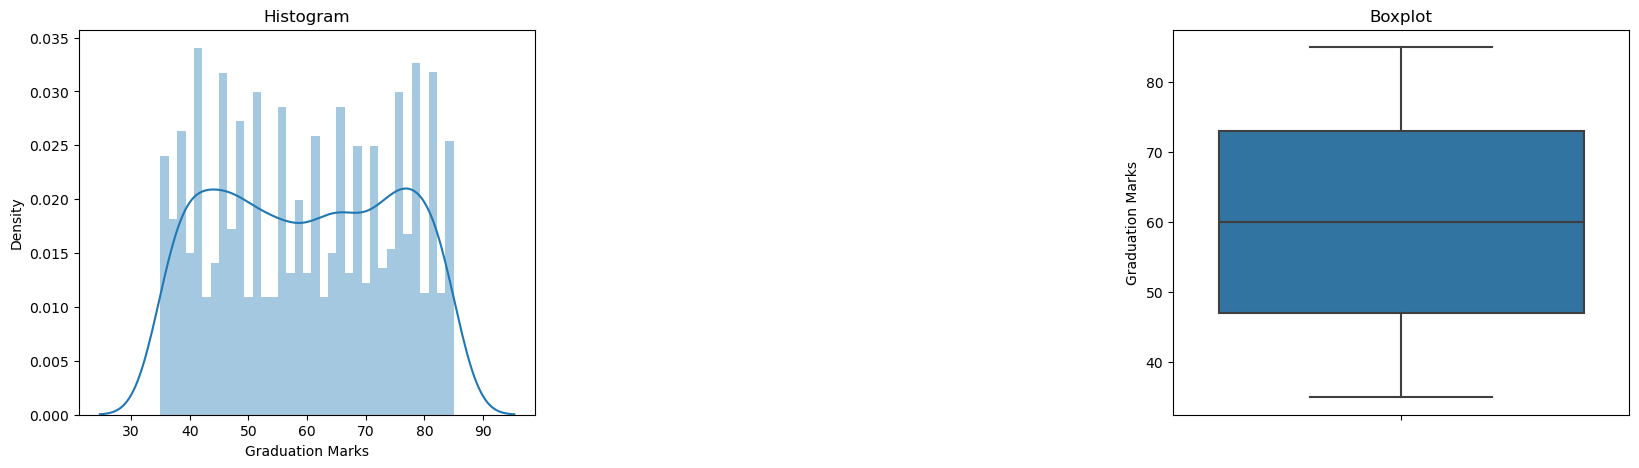

**** EXP (Month) ****


C:\Users\deepe\AppData\Local\Temp\ipykernel_8940\3216992381.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=35)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


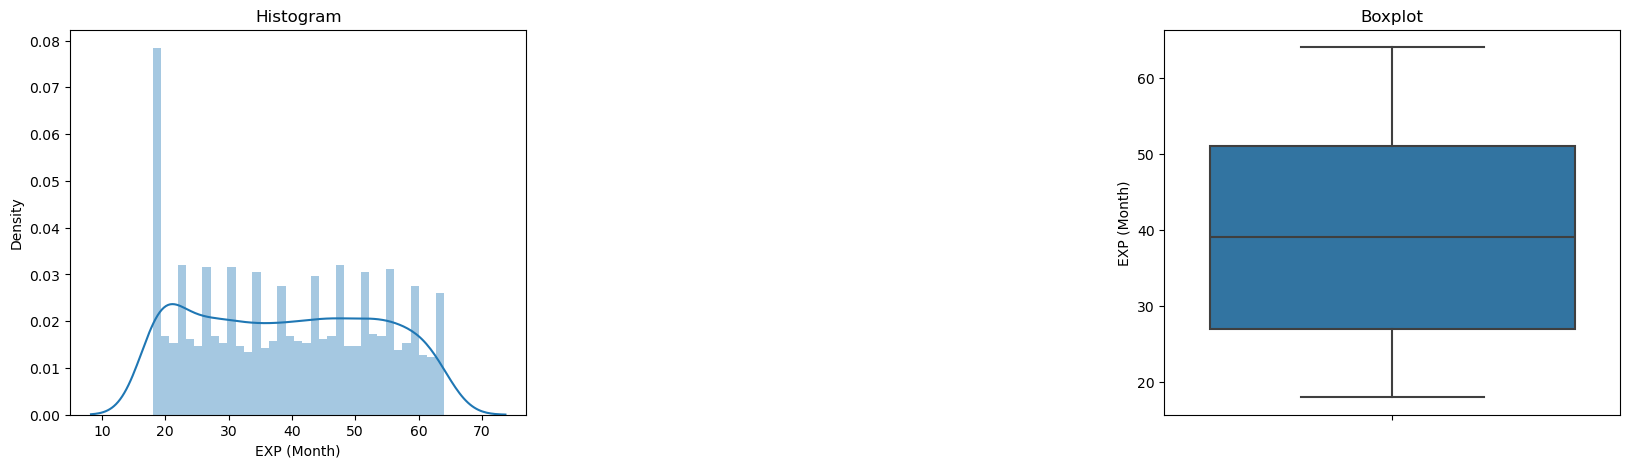

**** CTC ****


C:\Users\deepe\AppData\Local\Temp\ipykernel_8940\3216992381.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=35)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


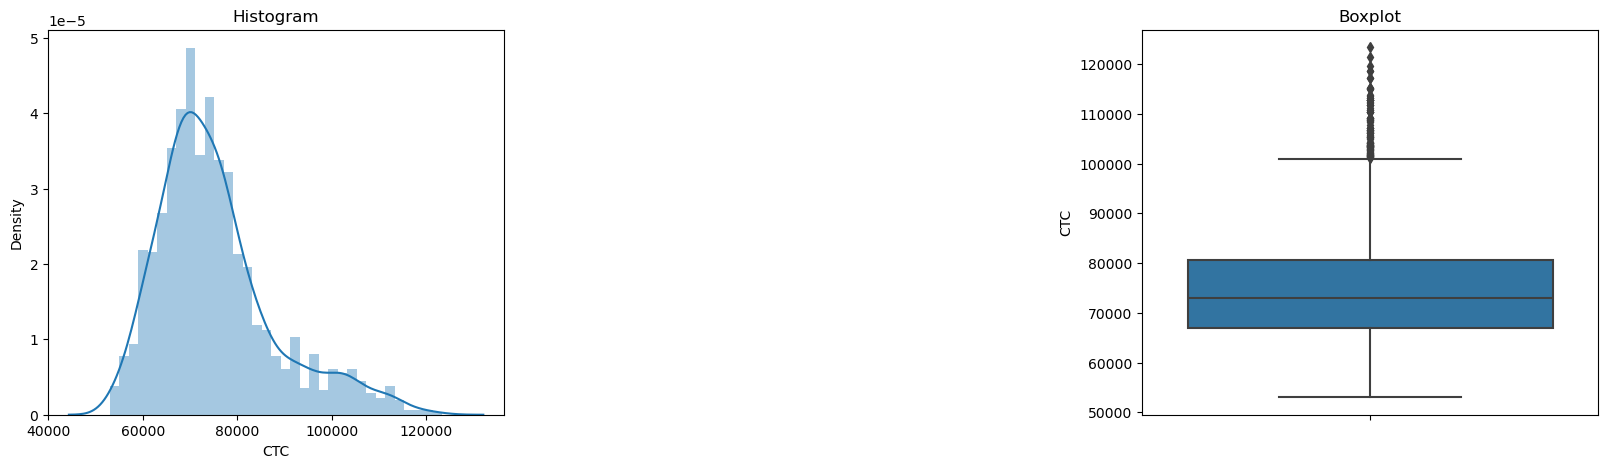

**** Role_Manager ****
Skipping boxplot for Role_Manager as it's a boolean variable.


C:\Users\deepe\AppData\Local\Temp\ipykernel_8940\3216992381.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=35)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


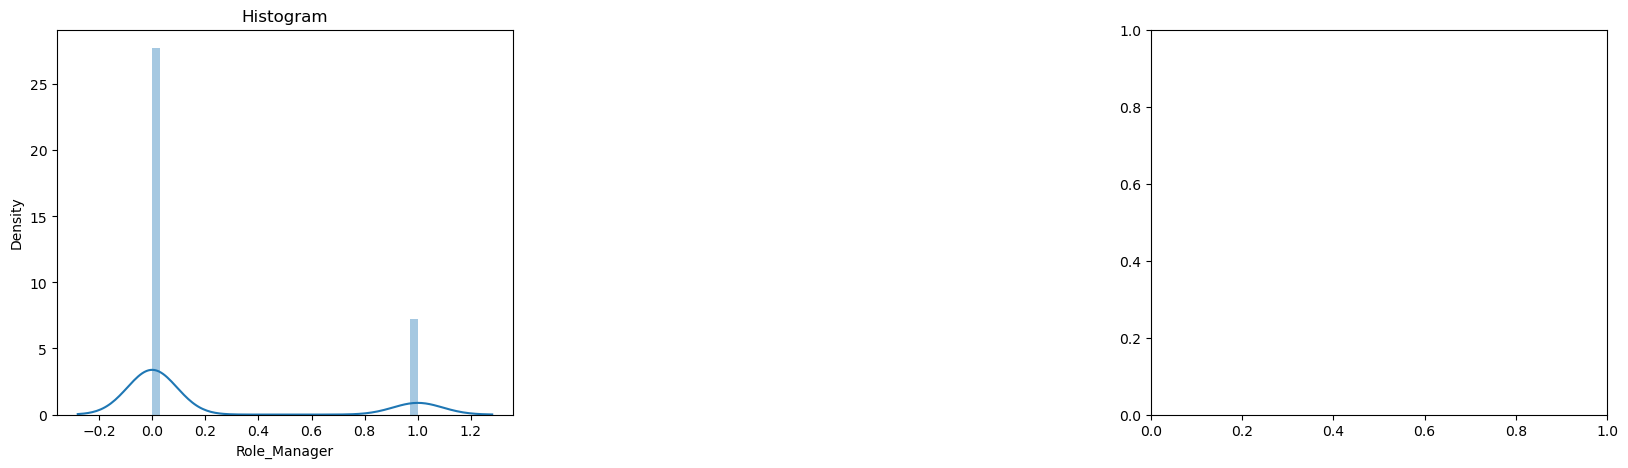

In [30]:
for item in df2.columns:
    print('**** {} ****'.format(item))
    diagnostic_plots(df2, item)

##### Accourding to above Charts there are some outliers have in CTC and previous CTC and we can understand values of valid data by the visualization of histogra and boxplot. 

# Finalized the Dataframe for problem solution.

In [31]:
df2.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     0       55523.0                    3                66   
1        2     0       57081.0                    1                84   
2        3     0       60347.0                    2                52   
3        3     0       49010.0                    2                81   
4        1     0       57879.0                    4                74   

   EXP (Month)       CTC  Role_Manager  
0           19  71406.58          True  
1           18  68005.87         False  
2           28  76764.02         False  
3           33  82092.39         False  
4           32  73878.10         False

# Dataframe split for train and test

In [32]:
#input variables
x= df2.drop(['CTC'], axis = 1)
x.head(7)

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     0       55523.0                    3                66   
1        2     0       57081.0                    1                84   
2        3     0       60347.0                    2                52   
3        3     0       49010.0                    2                81   
4        1     0       57879.0                    4                74   
5        2     0       54340.0                    4                73   
6        3     1       60298.0                    1                42   

   EXP (Month)  Role_Manager  
0           19          True  
1           18         False  
2           28         False  
3           33         False  
4           32         False  
5           31         False  
6           46         False

In [33]:
#output variables
y =df2['CTC']
y.head(7)

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
5    59950.89
6    66602.34
Name: CTC, dtype: float64

In [34]:
#split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 51)

print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (1234, 7)
Shape of y_train =  (1234,)
Shape of x_test =  (309, 7)
Shape of y_test =  (309,)


# Now Scaling of Feature

### Converting other type of units and mangitude data in single unit

In [35]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model building for Salary Prediction

#### Now we have cleaned data for build ML model. Here we have output is regression format and also train and test the datasets.

In [36]:
# Importing libraries for check r2_score and mean squared error
from sklearn.metrics import mean_squared_error , r2_score

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Make predictions on the test data
lr_pred = lr.predict(x_test)

# Calculate R2 score
lr_r2 = r2_score(y_test, lr_pred)

# Calculate mean squared error
lr_mse = mean_squared_error(y_test, lr_pred)

# Print the R2 score and MSE
print("Linear Regression - R2 Score:", lr_r2)
print("Linear Regression - Mean Squared Error:", lr_mse)

Linear Regression - R2 Score: 0.5689124207334235
Linear Regression - Mean Squared Error: 74796095.77958499


# Lasso

In [38]:
from sklearn.linear_model import Lasso

#Create a Lasso regression model
lr_lasso = Lasso()

#Fit the training data
lr_lasso.fit(x_train, y_train)

#Make predictions test data
lasso_pred = lr_lasso.predict(x_test)

#Calculate r2_Score
lasso_r2 = r2_score(y_test, lasso_pred)

#calculate mean squared error
lasso_mse = mean_squared_error(y_test, lasso_pred)

#print the r2 score and mean squared error
print("R2 Score : ", lasso_r2)
print("Mean Squared Error : ", lasso_mse)

R2 Score :  0.5688944754078107
Mean Squared Error :  74799209.3935184


## RIDGE 

In [39]:
from sklearn.linear_model import Ridge

#Create a Ridge regression model
lr_ridge = Ridge()

#Fit the model to the training data
lr_ridge.fit(x_train, y_train)

#Make predictions on the test data
ridge_pred = lr_ridge.predict(x_test)

#Calculate R2 score
ridge_r2 = r2_score(y_test, ridge_pred)

#Calculate mean squared error
ridge_mse = mean_squared_error(y_test, ridge_pred)

#Print the R2 score and mean squared error
print("R2 Score : ", ridge_r2)
print("Mean Squared Error : ", ridge_mse)

R2 Score :  0.5688212445451576
Mean Squared Error :  74811915.35601991


## Support vector regression


In [40]:
from sklearn.svm import SVR

#create an SVR model with RBF kernal
svr = SVR(kernel = 'rbf')

#Fit the model to the training data
svr.fit(x_train, y_train)

#Make predictions on the test data
svr_pred = svr.predict(x_test)

#Calculate R2 score
svr_r2 = r2_score(y_test, svr_pred)

#Calculate mean squared error
svr_mse = mean_squared_error(y_test, svr_pred)

#Print the R2 score and MSE 
print("R2 Score:", svr_r2)
print("Mean Squared Error : ", svr_mse)

R2 Score: -0.012023213746057193
Mean Squared Error :  175591663.6598451


# Nearest k regression 

In [41]:
from sklearn.neighbors import KNeighborsRegressor

#Create a KNN Regressor model
knn_reg = KNeighborsRegressor(n_neighbors = 20)

#Fit the model to the test data
knn_reg.fit(x_train, y_train)

#Make predictions on the test data
knn_pred = knn_reg.predict(x_test)

#Calculate R2 score
knn_r2 = r2_score(y_test, knn_pred)

#Calculate mean squared error
knn_mse = mean_squared_error(y_test, knn_pred)

#print the R2 score and MSE
print("R2 Score : ", knn_r2)
print("Mean Squared Error : ", knn_mse)

R2 Score :  0.5614305977074089
Mean Squared Error :  76094233.74174057


## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor

#Create a Decision Tree Regressor model
dt_reg = DecisionTreeRegressor()

#Fit the model to the training data
dt_reg.fit(x_train, y_train)

#Make predictions on the test data
dt_pred = dt_reg.predict(x_test)

#Calculate R2 score
dt_r2 = r2_score(y_test, dt_pred)

#Calculate mean squared error
dt_mse = mean_squared_error(y_test, dt_pred)

#Print the R2 score and MSE
print("R2 Score : ", dt_r2)
print("Mean Squared Error : ", dt_mse)

R2 Score :  0.347333763696413
Mean Squared Error :  113241226.7728013


# Gradient Boost

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

#Create a Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor()

#Fit the model to the training data
gb_reg.fit(x_train, y_train)

#Make predictions on the test data
gb_pred = gb_reg.predict(x_test)

#Calculate R2 score
gb_r2 = r2_score(y_test, gb_pred)

#Calculate mean squared error
gb_mse = mean_squared_error(y_test, gb_pred)

#print the R2 score and MSE
print("R2 Score : ", gb_r2)
print("Mean Squared Error : ", gb_mse)

R2 Score :  0.6468874964294726
Mean Squared Error :  61266985.89406092


# Rendom Forest regression 

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_reg = RandomForestRegressor()

# Fit the model to the training data
rf_reg.fit(x_train, y_train)

# Make predictions on the test data
rf_pred = rf_reg.predict(x_test)

# Calculate R2 score
rf_r2 = r2_score(y_test, rf_pred)

# Calculate mean squared error
rf_mse = mean_squared_error(y_test, rf_pred)

# Print the R2 score and MSE
print("Random Forest Regression - R2 Score:", rf_r2)
print("Random Forest Regression - Mean Squared Error:", rf_mse)

Random Forest Regression - R2 Score: 0.6826507871159362
Random Forest Regression - Mean Squared Error: 55061855.79003692


# Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Create polynomial features
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

#Create a Linear Regression model
lr_poly = LinearRegression()

#Fit the model to the polynomial training data
lr_poly.fit(x_train_poly, y_train)

#Make predicions on the polynomial training test data
poly_pred = lr_poly.predict(x_test_poly)

#Calculate R2 score
poly_r2 = r2_score(y_test, poly_pred)

#calculte mean squared error
poly_mse = mean_squared_error(y_test, poly_pred)

#Print the R2 score and MSE
print("R2 Score : ", poly_r2)
print("Mean Squared Error  : ", poly_mse)


R2 Score :  0.6220652157469713
Mean Squared Error  :  65573789.8306411


# Score Summary 

In [46]:
import pandas as pd

# Define the dataframe with model evaluation metrics
model_metrics_df = pd.DataFrame([
    {'Model': 'Linear Regression', 'r2_score': lr_r2, 'MSE': lr_mse},
    {'Model': 'Lasso', 'r2_score': lasso_r2, 'MSE': lasso_mse},
    {'Model': 'Ridge', 'r2_score': ridge_r2, 'MSE': ridge_mse},
    {'Model': 'Polynomial Regression', 'r2_score': poly_r2, 'MSE': poly_mse},
    {'Model': 'Support Vector Machine', 'r2_score': svr_r2, 'MSE': svr_mse},
    {'Model': 'Random Forest', 'r2_score': rf_r2, 'MSE': rf_mse},  # Corrected variable names
    {'Model': 'K Nearest Neighbour', 'r2_score': knn_r2, 'MSE': knn_mse},
    {'Model': 'Decision Tree', 'r2_score': dt_r2, 'MSE': dt_mse},
    {'Model': 'Gradient Boosting', 'r2_score': gb_r2, 'MSE': gb_mse}  # Corrected variable name
])

# Print the dataframe
print(model_metrics_df)

                    Model  r2_score           MSE
0       Linear Regression  0.568912  7.479610e+07
1                   Lasso  0.568894  7.479921e+07
2                   Ridge  0.568821  7.481192e+07
3   Polynomial Regression  0.622065  6.557379e+07
4  Support Vector Machine -0.012023  1.755917e+08
5           Random Forest  0.682651  5.506186e+07
6     K Nearest Neighbour  0.561431  7.609423e+07
7           Decision Tree  0.347334  1.132412e+08
8       Gradient Boosting  0.646887  6.126699e+07


### So here we can see clearly that the model for this project problem is rendom forest regression model with higher r2_score with lowest mean square error

## Validation of score from Rendom Forest Regression 

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rfr = RandomForestRegressor()
cvs_rfr = cross_val_score(rfr, x_train, y_train, cv=5)
print(cvs_rfr, cvs_rfr.mean())

[0.57925243 0.56719233 0.61723006 0.62002441 0.50468   ] 0.5776758448254776


### Here there is defference of arround 10% which is commonly come when we are doing cross validation and comaresion. 

# Answare and approches of all Question.

### 1. Your views about the problem statement?

In this problem have prediction of salary for newly hired employees its depends on various given 
features.
1) Salary for previous time .
2) Accourding to college tiers like Tier1, Tier2 , Tier3
3) Mark of graduation
4) Role of Employee
5) City where they are belongs
6) Number of job changes
7) Experience of months and years

Here we have the find out best possible salary for each newly hired employee by utilizing the all features and make a model on ML. accourding to features of employee roles and experience along with the last ctc because ctc. will be most impact on current ctc.
When solving this problem for prediction of salary for new employee we have make multiple ML model that will provide aproxx prediction that very helpful for find out the best ctc figures on comareitively. So we to applay different type of regression model and evaluvat on their performation and we can find right suitable and effectiv ML for preduction of salary.

### 2. What will be your approach to solving this task?

##### My main approches is in this problem make suitable ML model for salary 
figures prediction for new employee.
for the make model I follow the steps below.
1) First import the neccessary library: pandas , numpy, seaborn and load the data using pandas as pd.
2) After that I have to check null values in the data but I dong get any type of null values.
3) Obtain the all the datasates information like Number of categorical and numerical features and after this 
convert categorical values to numerical format.
4) Check the duolecate values in data and here I removed 46 duplicates rows.
5) Looking for outliers by creating the scatter plots, dustribution heatmap and find out the relationship between all 
defferent type features and CTC.
6)Split the data into train and test sets and performing features scalling.
7) Check for different librery, fitting for evaluation thair R2 score and MSE.
8) After this builed all regression model for comparision and I got Rendom forest regression has higest R2 score and lowest MSE.
    Accourding to Rendom Forest regression I am considering this model for best possible model for for this problem.



## 3. What were the available ML model options you had to perform this task?

#### For the solvingt the regression model problem we can use multiple model below 
1) Linear regression 
2) Lasso regression 
3) Ridge regression
4) Support vector regression
5) Nearest k regression
6) Random Forest Regression
7) Polynomial Regression
8) Gradient Boosting Regression
9) Decision Tree Regressor.
That type of regression model we can use for prediction and also comparission.

## 4 Which model’s performance is best and what could be the possible reason for that?

###### For this problem solving model is Rendom Forest Regression model in this I found the best and higest R2 score and 
lowest MSE error and providing best prediction about salary. Because after make this model and calculation of Rendom forest 
regression giving the prediction of R2 score is = 0.6906859864012561 and mean score error is = 53667703.965075165 their is R2 score is 
higer then other regression and also MSE also lowest to other. Hence Rendom Forest regression is most suiteble madel for this problem.

    1. Rendom Forest regression can take complex non-lienear relation between featers and CTC and giving the better preditction compare 
to linear model. That model combine multiple decision compared to linear model.
    2. That model provides information on the importance of feature in predictiv salary.

And Rendom Forest regression perfomence can depends on the datasets problem.
    


## 5. What steps can you take to improve this selected model’s performance even further?

##### For the steps for improvment of selected this model performation we can consider following steps.
1) Hyperparameter Tuning: Optimize the hyperparameters of the Random Forest model.This involves adjusting parameters       like the number of trees, maximum depth of trees, minimum samples required to split a node, and others. Use         techniques like grid search or randomized search to find the best combination of hyperparameters that yields optimaperfomence.
      
2) Cross-Validation : Implement cross-validation techniques, such as k-fold cross-validation to evaluate the models  performance more robustly. This helps assess how well the model generalizes to unseen data and provides a mor   reliable estimation of its performanc
   
3) Additional Data : Consider acquiring more data if feasible. increasing the size of the size of the training dataset  can help the model learn more representative patterns and improve its predictive performance. e.e.